---
title: "Hello world: Planet Kornia"
description: "Welcome to Planet Kornia: a set of tutorials to learn about **Computer Vision** in [PyTorch](https://pytorch.org)."
author:
    - "Edgar Riba"
date: 01-21-2021
categories:
    - Basic
    - kornia.io
image: "../tutorials/assets/hello_world_tutorial.png"
---

<a href="https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/nbs/hello_world_tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in google colab"></a>

Welcome to Planet Kornia: a set of tutorials to learn about **Computer Vision** in [PyTorch](https://pytorch.org).

This is the first tutorial that show how one can simply start loading images with [Kornia](https://kornia.org) and [OpenCV](https://opencv.org).


In [ ]:
%%capture
!pip install kornia
!pip install kornia-rs

In [ ]:
import cv2
import kornia as K
import numpy as np
import torch
from matplotlib import pyplot as plt

Download first an image form internet to start to work.


In [ ]:
import io

import requests


def download_image(url: str, filename: str = "") -> str:
    filename = url.split("/")[-1] if len(filename) == 0 else filename
    # Download
    bytesio = io.BytesIO(requests.get(url).content)
    # Save file
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())

    return filename


download_image("https://github.com/kornia/data/raw/main/arturito.jpg")

'arturito.jpg'

## Load an image with Kornia

With Kornia, we can read the image which returns the images in a `torch.Tensor` in the shape `(C,H,W)`. Also, we can convert a image (array) into a Tensor.

We have a couple of utilities to cast the image to a `torch.Tensor` to make it compliant to the other Kornia components and arrange the data in `(B,C,H,W)`.


The read function is [`kornia.io.load_image`](https://kornia.readthedocs.io/en/latest/io.html#kornia.io.load_image), to use it, you need to `pip install kornia_rs`.

The package internally implements `kornia_rs` which contains a low level implementation for Computer Vision in the Rust language. In addition, we implement the DLPack protocol natively in Rust to reduce the memory footprint during the decoding and types conversion.

You can define the type you can load into the tensor, with `K.io.ImageLoadType.RGB32` mode the image will be loaded as *float32* with values between 0~1.0. Also can define the desired device you want to read the image.

In [ ]:
img_bgr_tensor = K.io.load_image("arturito.jpg", K.io.ImageLoadType.RGB32, device="cpu")

img_bgr_tensor

tensor([[[0.9412, 0.9412, 0.9412,  ..., 0.9412, 0.9412, 0.9412],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.6471, 0.6471, 0.6471,  ..., 0.6471, 0.6471, 0.6471],
         [0.6392, 0.6392, 0.6392,  ..., 0.6392, 0.6392, 0.6392],
         [0.6510, 0.6510, 0.6510,  ..., 0.6510, 0.6510, 0.6510]],

        [[0.9412, 0.9412, 0.9412,  ..., 0.9412, 0.9412, 0.9412],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.6471, 0.6471, 0.6471,  ..., 0.6471, 0.6471, 0.6471],
         [0.6392, 0.6392, 0.6392,  ..., 0.6392, 0.6392, 0.6392],
         [0.6510, 0.6510, 0.6510,  ..., 0.6510, 0.6510, 0.6510]],

        [[0.9412, 0.9412, 0.9412,  ..., 0.9412, 0.9412, 0.9412],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

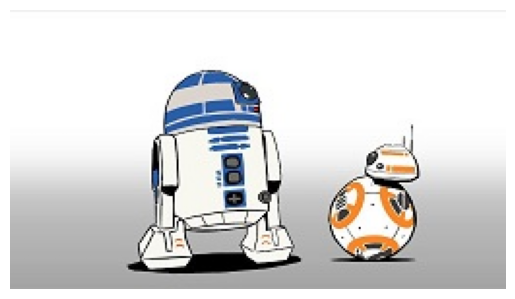

In [ ]:
plt.imshow(K.tensor_to_image(img_bgr_tensor))
plt.axis("off");

## Load an image with OpenCV

We can use OpenCV to load an image. By default, OpenCV loads images in BGR format and casts to a `numpy.ndarray` with the data layout `(H,W,C)`. 

However, because matplotlib saves an image in RGB format, in OpenCV you need to change the BGR to RGB so that an image is displayed properly.

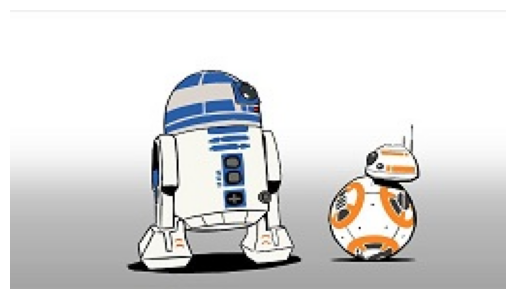

In [ ]:
img_bgr: np.array = cv2.imread("arturito.jpg")  # HxWxC / np.uint8
img_rgb: np.array = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off");

The utility is [`kornia.image_to_tensor`](https://kornia.readthedocs.io/en/latest/utils.html#kornia.utils.image_to_tensor) which casts a `numpy.ndarray` to a `torch.Tensor` and permutes the channels to leave the image ready for being used with any other PyTorch or Kornia component.  

The image is casted into a 4D `torch.Tensor` with zero-copy.

In [ ]:
x_bgr: torch.tensor = K.image_to_tensor(img_bgr)  # CxHxW / torch.uint8
x_bgr = x_bgr.unsqueeze(0)  # 1xCxHxW
print(f"convert from '{img_bgr.shape}' to '{x_bgr.shape}'")

convert from '(144, 256, 3)' to 'torch.Size([1, 3, 144, 256])'


We can convert from BGR to RGB with a [`kornia.color`](https://kornia.readthedocs.io/en/latest/color.html) component.


In [ ]:
x_rgb: torch.tensor = K.color.bgr_to_rgb(x_bgr)  # 1xCxHxW / torch.uint8

## Visualize an image with Matplotib

We will use [Matplotlib](https://matplotlib.org/) for the visualisation inside the notebook. Matplotlib requires a `numpy.ndarray` in the `(H,W,C)` format, and for doing so we will go back with [`kornia.tensor_to_image`](https://kornia.readthedocs.io/en/latest/utils.html#kornia.utils.image_to_tensor) which will convert the image to the correct format.



In [ ]:
img_bgr: np.array = K.tensor_to_image(x_bgr)
img_rgb: np.array = K.tensor_to_image(x_rgb)

Create a subplot to visualize the original an a modified image



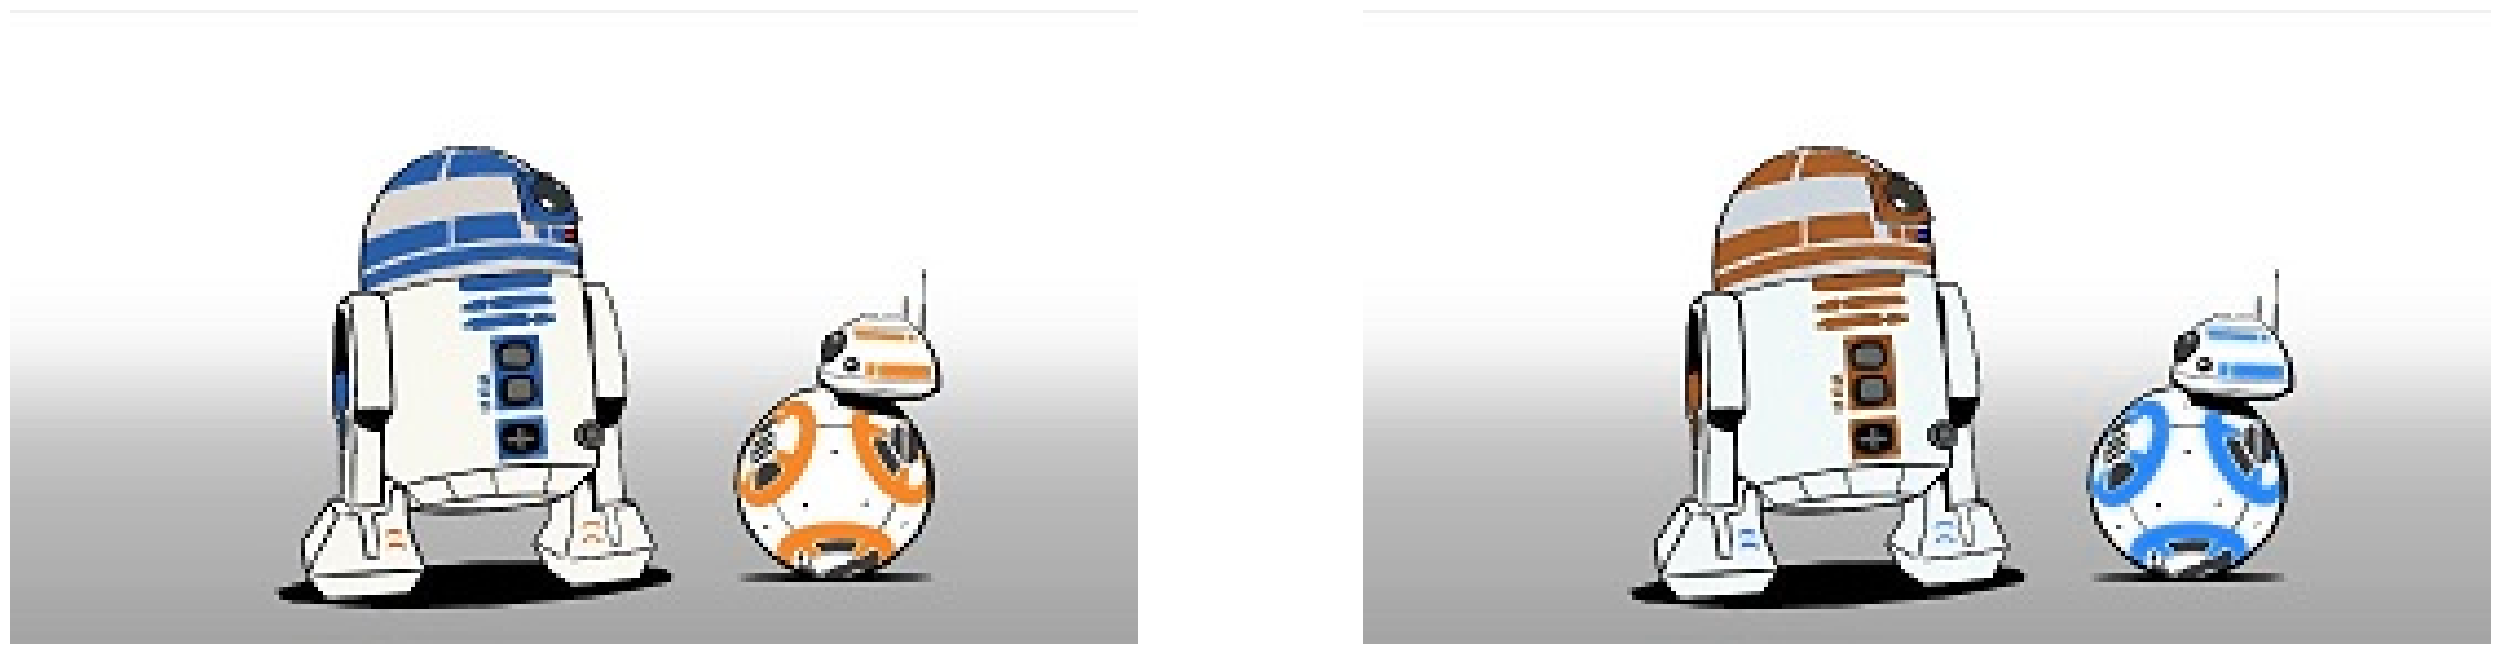

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(32, 16))
axs = axs.ravel()

axs[0].axis("off")
axs[0].imshow(img_rgb)

axs[1].axis("off")
axs[1].imshow(img_bgr)

plt.show()